In [1]:
pip install opendatasets

In [3]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/osmankagankurnaz/facial-feature-extraction-dataset")

Dataset URL: https://www.kaggle.com/datasets/osmankagankurnaz/facial-feature-extraction-dataset


100%|██████████| 24.5M/24.5M [00:02<00:00, 9.95MB/s]


In [4]:
train_img="/content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/train/images"
train_lab="/content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/train/labels"

val_img="/content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/valid/images"
val_lab="/content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/valid/labels"

test_img="/content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/test/images"
test_lab="/content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/test/labels"

In [5]:
!nvidia-smi

Sat Jan 18 07:55:12 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 54.1 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/data.yaml epochs=60 imgsz=800 plots=True

100% 6.25M/6.25M [00:00<00:00, 355MB/s]
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

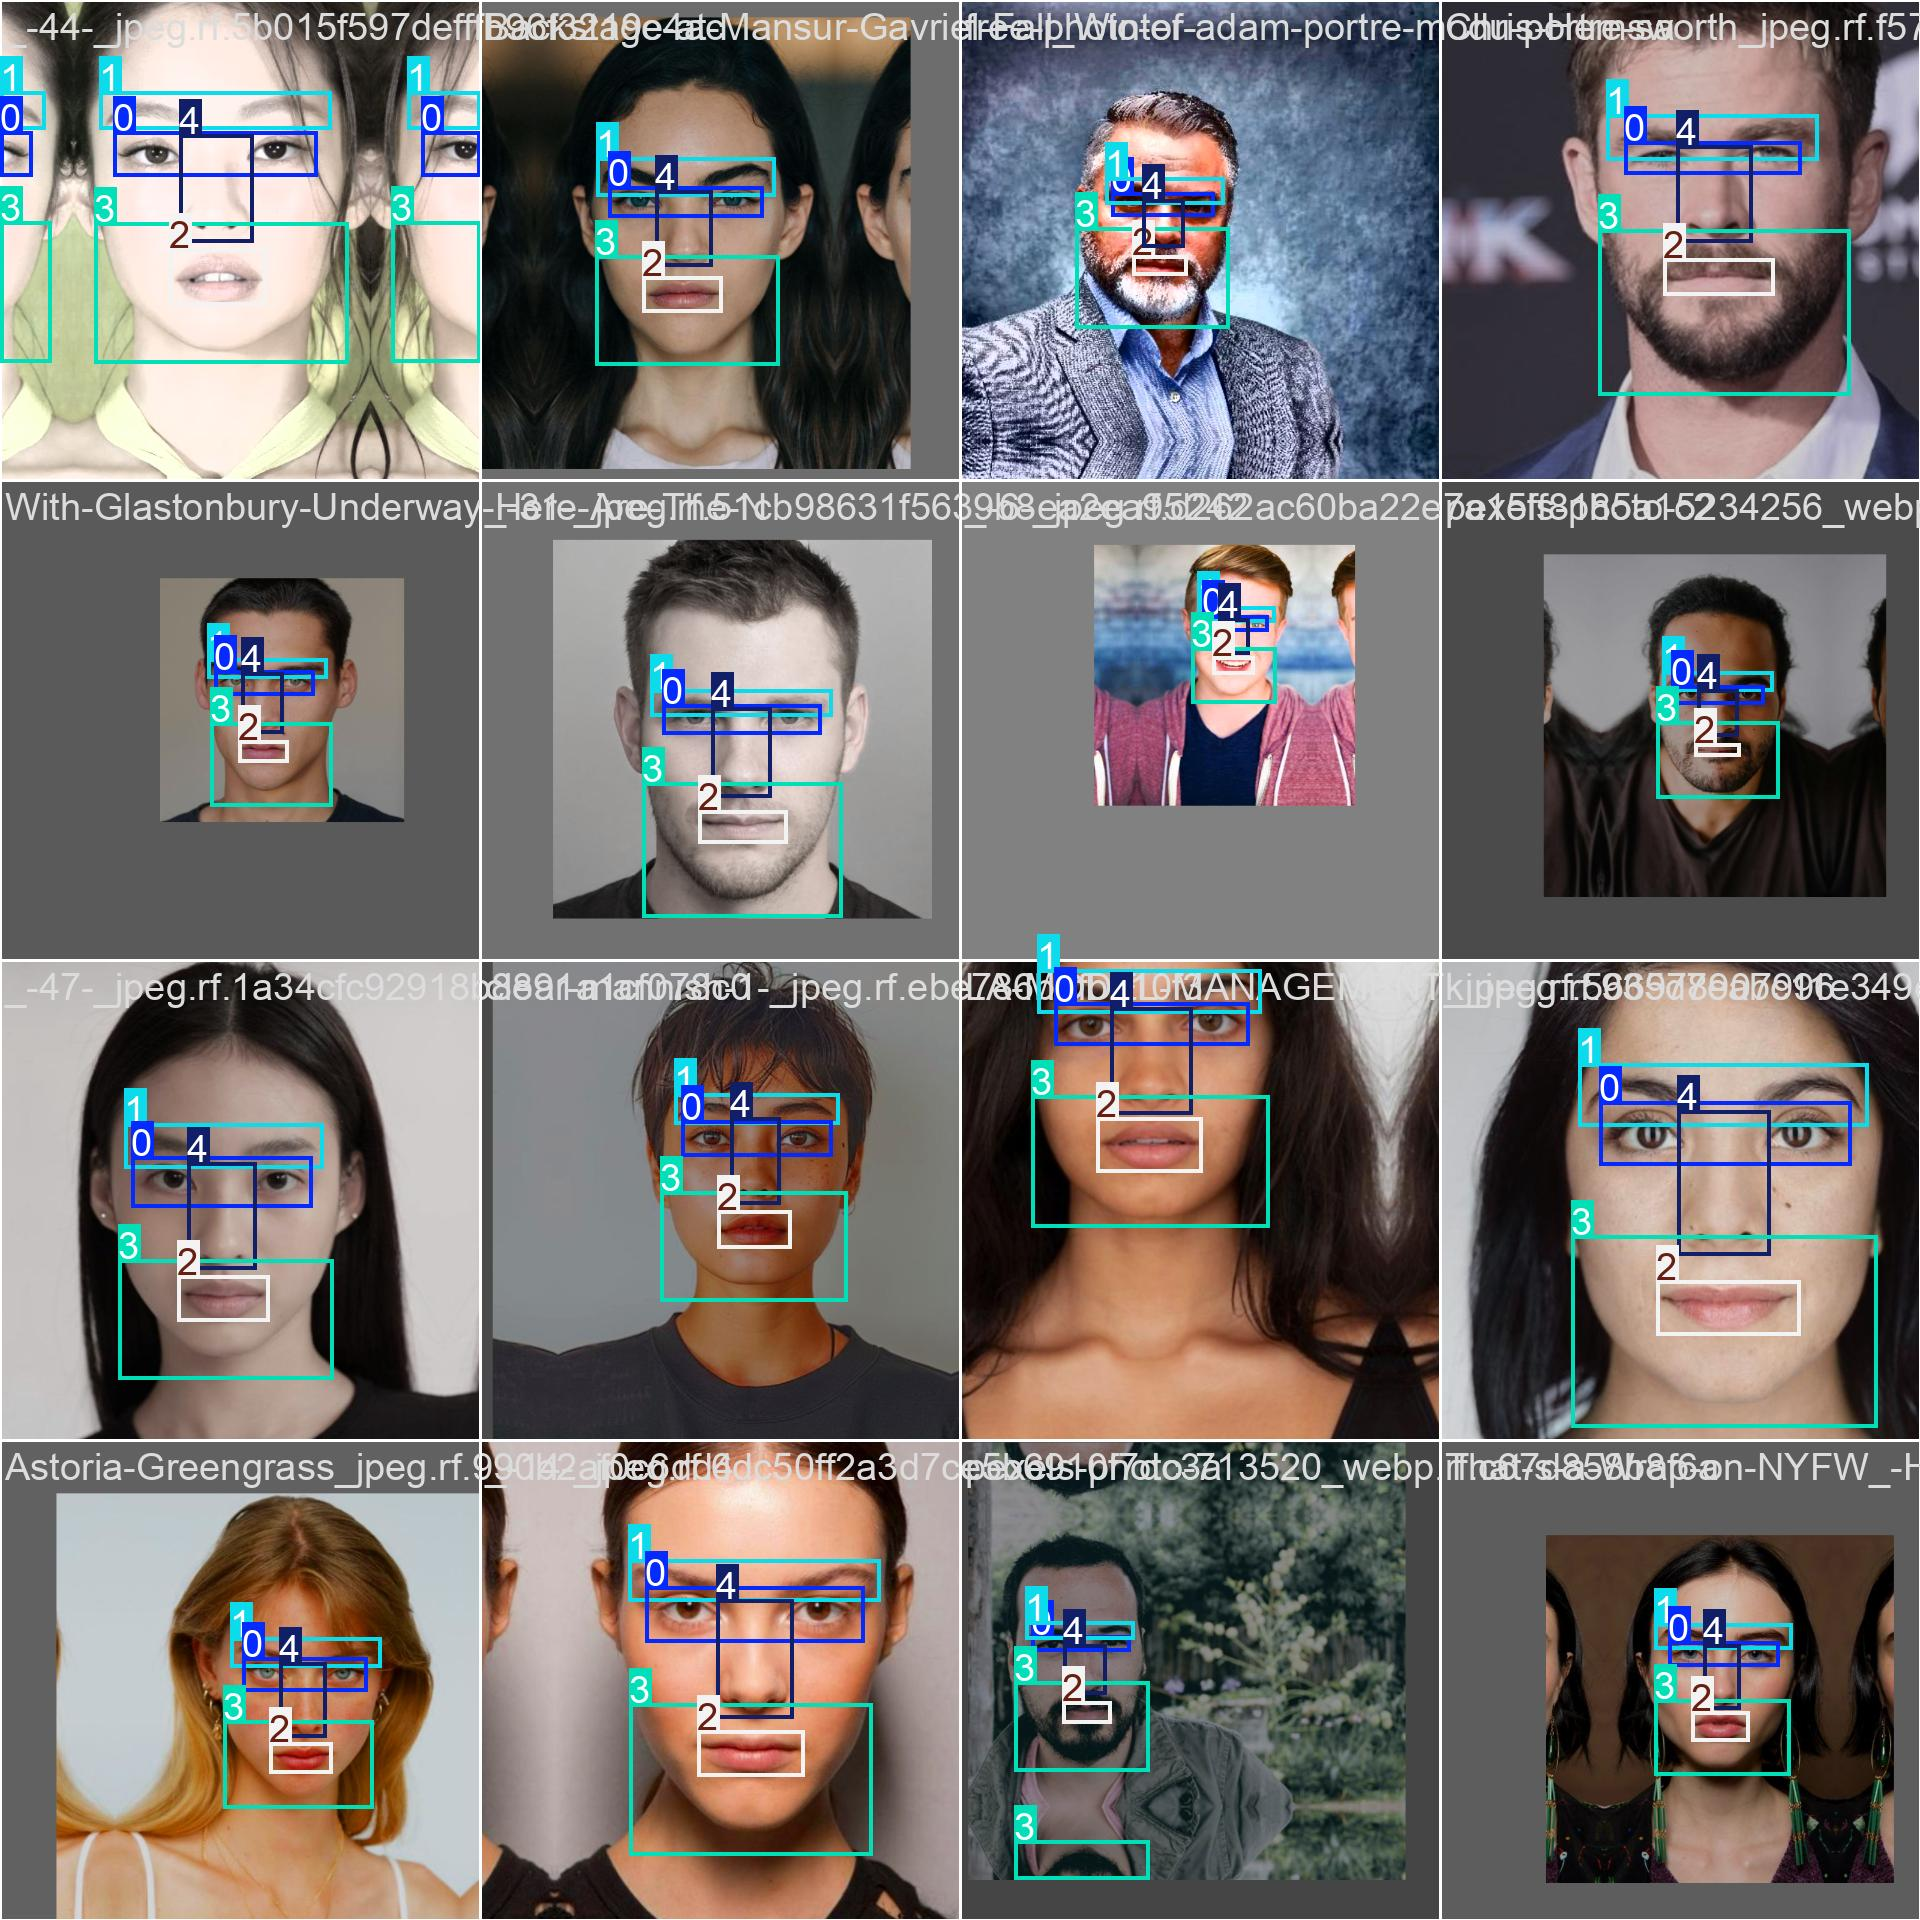

In [9]:
Image(filename="/content/runs/detect/train/train_batch1451.jpg", width=600)

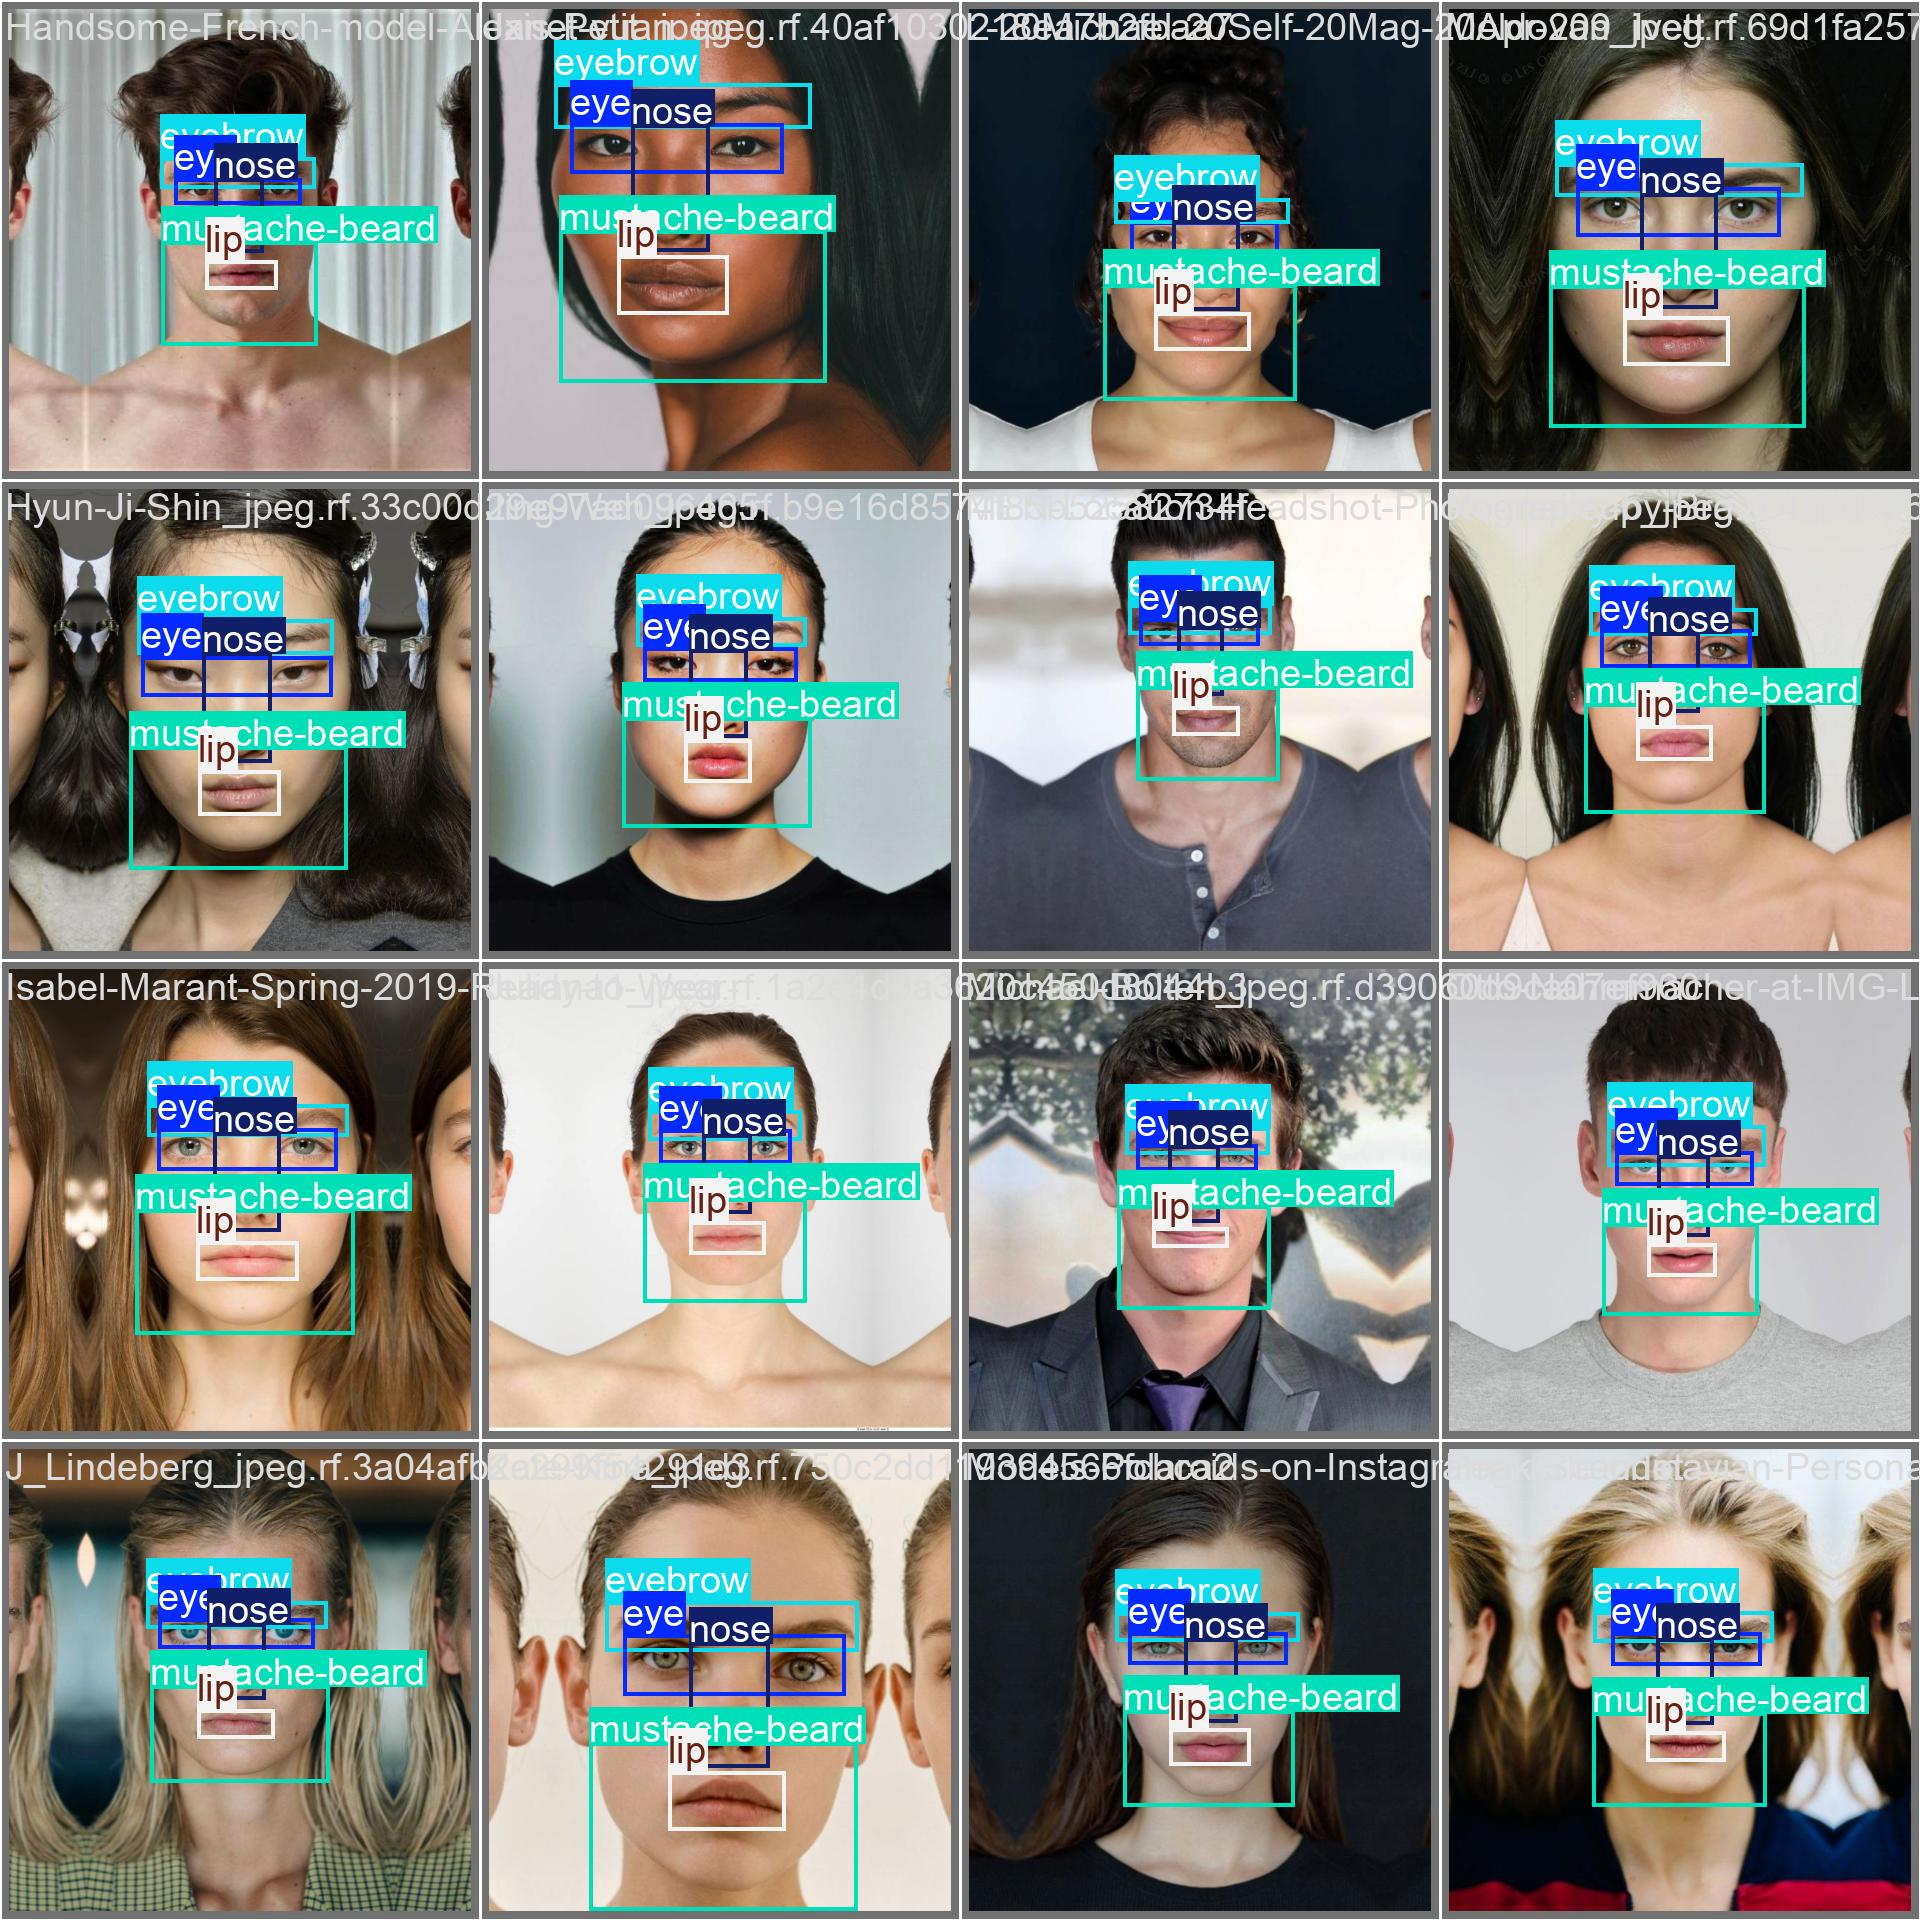

In [10]:
Image(filename="/content/runs/detect/train/val_batch1_labels.jpg",width=600)

VALIDATION

In [11]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/data.yaml

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/valid/labels.cache... 126 images, 0 backgrounds, 0 corrupt: 100% 126/126 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:04<00:00,  1.83it/s]
                   all        126        685      0.993      0.994      0.995      0.845
                   eye        126        138      0.992      0.993      0.995      0.838
               eyebrow        126        144      0.986      0.989      0.994      0.787
                   lip        126        129      0.991          1      0.995      0.877
        mustache-beard        126        146      0.998      0.986      0.995       0.85
                  nose        126        128      0.998          1      0.995      0.874
S

PREDICTION

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/test/images save=True

Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/66 /content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/test/images/0f90d5ec-c244-43ed-85d6-94368559735b_jpeg.rf.74c96f9726a2bb054912d6591fc49790.jpg: 800x800 1 eye, 1 eyebrow, 1 lip, 1 mustache-beard, 1 nose, 10.0ms
image 2/66 /content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/test/images/184e57da5b53f50ed48af6d3394d4fce_jpg.rf.1acd31e78ab43808f26c6db74c4daf91.jpg: 800x800 3 eyes, 3 eyebrows, 1 lip, 3 mustache-beards, 1 nose, 10.1ms
image 3/66 /content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/test/images/5a877522-b126-48a8-b74c-5d7806dde121_jpeg.rf.16ec407949a83b3d8f2349baa53b9e4b.jpg: 800x800 3 eyes, 4 eyebrows, 2 lips, 3 mustache-beards, 1 nose, 10.0ms
image 4/66 /content/facial-feature-extraction-dataset/FacialFeatureExtractionDataset/test/images

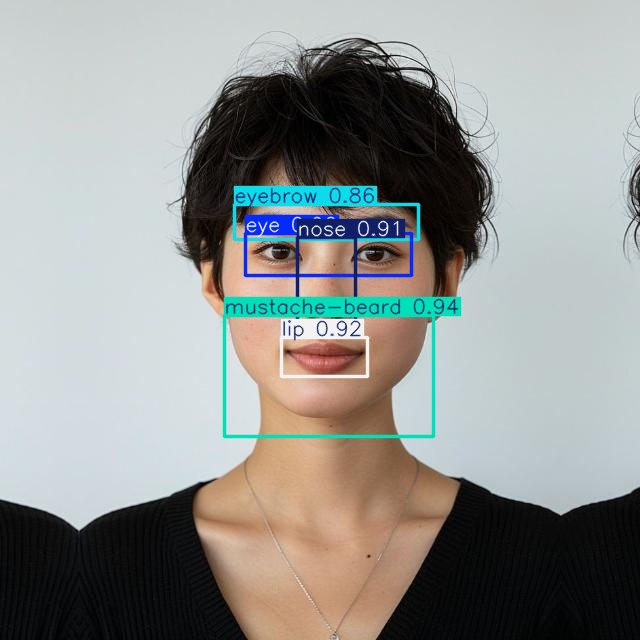

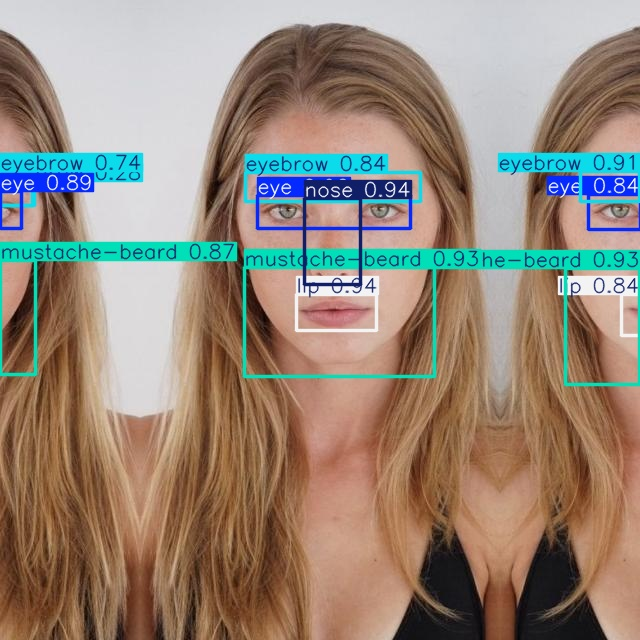

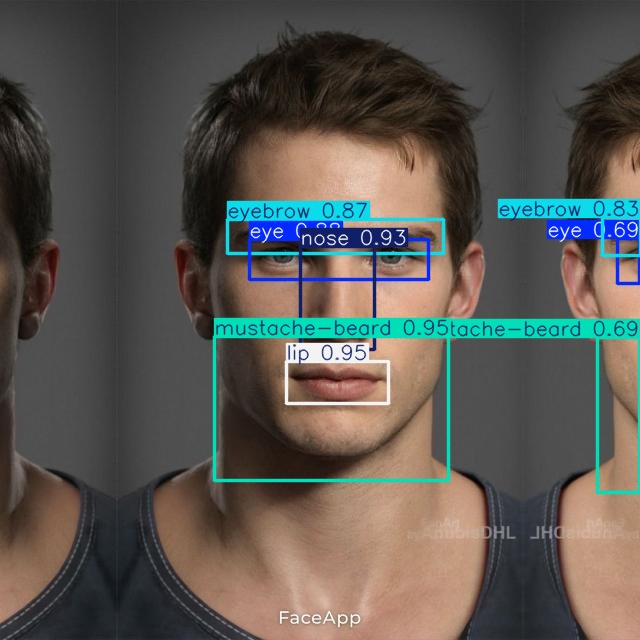

In [13]:
import glob
from IPython.display import Image, display
import os

# Define the base path where the folders are located
base_path = '/content/runs/detect'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [1]:
from google.colab import files

files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

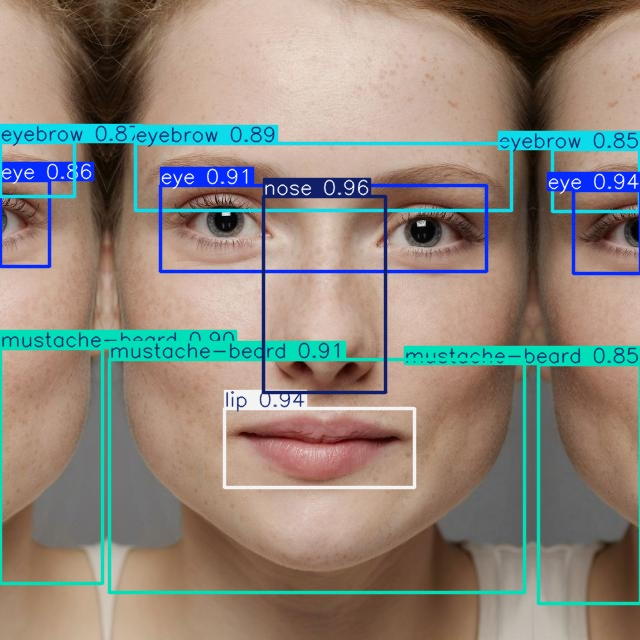

In [4]:
Image(filename="/content/runs/detect/predict/_-1-_jpeg.rf.c489f5ce8dea6375b0a132388ef09671.jpg",width=600)